# 0. Install and import libraries 

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import re
import html
import sklearn
import html

import nltk
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords 
from nltk.tokenize import RegexpTokenizer
from bs4 import BeautifulSoup





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ween\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 1. Data Clearning

## 1.1 Define a clean function

In [2]:
def clean(s):
    notag_attri_result = BeautifulSoup(s, "lxml").text #html tags and attributes remove
    
    nohtml_result = html.unescape(notag_attri_result) #replace Html character codes with ASCII equivalents
    
    nourl_result = re.sub(r"http\S+", "", nohtml_result) #remove url
    
    lowercase_result=nourl_result.lower() #change to lowercase
    
    nohashtag_result = re.sub(r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)",'', lowercase_result) #remove hashtag
    
    nomentions_result = re.sub(r'(?:@[\w_]+)', '', nohashtag_result) #remove mentions
    
    noemoji_result = re.sub(r"""(?:[:=;][dD\)\]\(\]/\\OpP])""", '', nomentions_result) #remove emoji ## all lowercase 
    
    nodash_result = noemoji_result.replace("-","")  #remove dash
  
    stop_words = open('stop_words.txt') #read stop words

    stop_words = stop_words.read().split() #split stop_words.txt so all the stop words can be read

    word_tokens = RegexpTokenizer('\w+').tokenize(nodash_result) 
  
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
    filtered_sentence = [] 
  
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    clean_text=' '.join([w for w in filtered_sentence if len(w)>3])#untokenrize and filted out words withe length less than 3
    return clean_text

## 1.2 read files and test on one tweet

In [3]:
#read both files
gt=pd.read_csv('generic_tweets.txt', sep=",")
ua=pd.read_csv('US_airline_tweets.csv')

#test on one tweet in generic tweets
print(clean(gt.iloc[0]['text']))   
  
#test on one tweet in US airline data
print(clean(ua.iloc[0]['text']))

awww bummer shoulda david carr third
commercials experience tacky


## 1.3 Clean generic tweets

In [4]:
tweets=gt[['class']].copy()

i=0
clean_tweet=[]
for row in gt['text']:
    clean_tweet.append(clean(gt.iloc[i]['text']))
    i+=1
tweets['text']=clean_tweet
tweets.to_csv('tweets.csv',index=False)

## 1.4 Clean US airline data

### 1.4.1 Recognize airline names

In [5]:
#Define a function to recognize airline names in tweets
def airline(s):
    s=s.lower()
    if '@united' in s:
        return 'united'
    if '@virginamerica' in s:
        return 'virginamerica'
    if '@southwest' in s:
        return 'southwest'
    if '@jetblue' in s:
        return 'jetblue'
    if '@usairways' in s:
        return 'usairways'
    if '@americanair' in s:
        return 'americanair'
    else:
        if '#united' in s:
            return 'united'
        if '#virginamerica' in s:
            return 'virginamerica'
        if '#southwest' in s:
            return 'southwest'
        if '#jetblue' in s:
            return 'jetblue'
        if '#usairways' in s:
            return 'usairways'
        if '#americanair' in s:
            return 'americanair'


### 1.4.2 Form a DataFrame with airline names, numerical sentiment values and cleaned tweets

In [6]:
# store airline names and translate sentiment value to numbers
i=0
us_air=pd.DataFrame()
airname=[]
sentiment=[]

airline(ua.iloc[0]['text'])
for row in ua['text']:
    airname.append(airline(ua.iloc[i]['text']))
    i+=1
    
i=0
for row in ua['sentiment']:
    if ua.iloc[i]['sentiment']=='negative':
        sentiment.append(0)
    else:
        sentiment.append(4)
    i+=1
    
us_air['sentiment']=sentiment
us_air['airline']=airname

In [7]:
#Copy the nagative reasons
us_air['negative_reason']=ua[['negative_reason']].copy()

#Clean tweets text
i=0
clean_tweet=[]
for row in ua['text']:
    clean_tweet.append(clean(ua.iloc[i]['text']))
    i+=1
us_air['text']=clean_tweet
us_air.to_csv('us_air.csv',index=False)

# 2. Visualizing

## 2.1 Sentiment level by airlines in US airline data

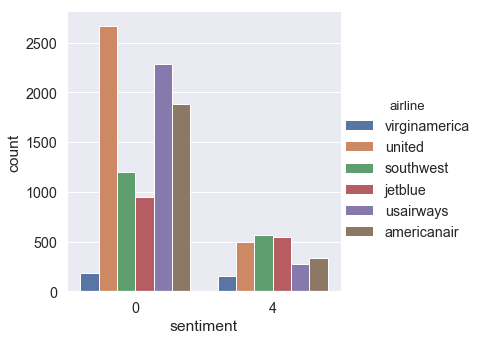

In [8]:
import seaborn as sns
sns.set(font_scale=1.3) #set font scale so it is more readable

#plot sentiment value (0 to be the negative and 4 to be the positive) by couts of observations with airlines as the categories 
sns.catplot(x="sentiment", hue="airline", kind="count", data=us_air)


### <font color=blue>The distribution of the US airlines of the tweets shows that most of the time people go online and complain about airlines, hence the negative sentiment</font>

## 2.2 Generic Tweets Word Clouds

### 2.2.1 Overall

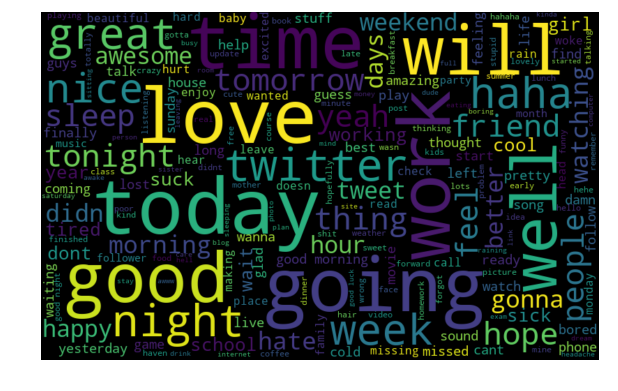

In [9]:
!pip install wordcloud
from wordcloud import WordCloud

# Make a big string with every clean tweet inside
text=' '.join([text for text in tweets['text']])

#word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



### 2.2.2 Just the tweets with negative sentiment

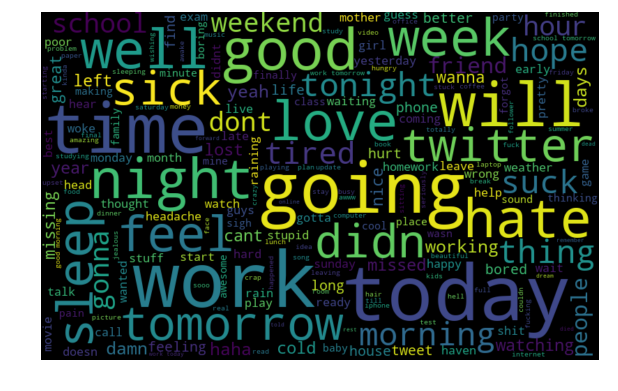

In [10]:
#just for the negative
negative_text=' '.join([text for text in tweets['text'][tweets['class'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2.2.3 Just the tweets with positive sentiment

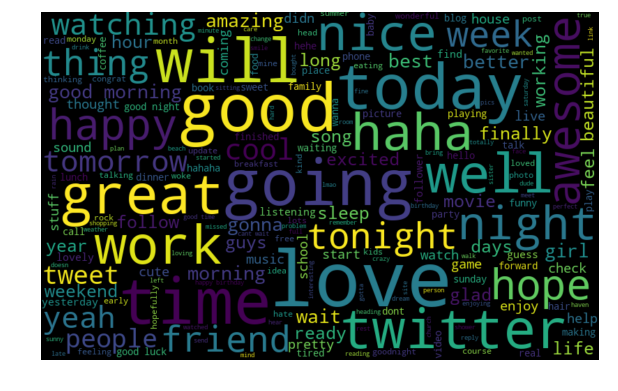

In [11]:
#just for the positive
positive_text=' '.join([text for text in tweets['text'][tweets['class'] == 4]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 2.3 US airline data word cloud

### 2.3.1 Overall

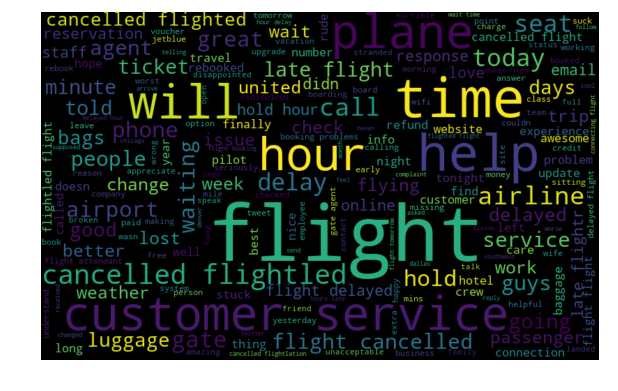

In [12]:
#for all US air line
air_text=' '.join([text for text in us_air['text']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(air_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2.3.2 Just the negative tweets

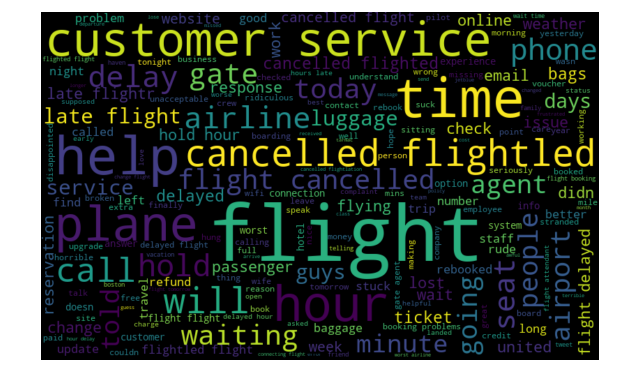

In [13]:
#for negative US air line
neg_air_text=' '.join([text for text in us_air['text'][us_air['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg_air_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2.3.3 Just the positive tweets

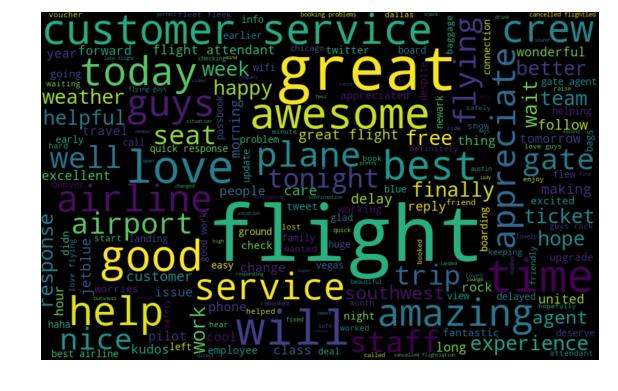

In [14]:
#for positive US air line
pos_air_text=' '.join([text for text in us_air['text'][us_air['sentiment'] == 4]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pos_air_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 3. Model preparation

## 3.1 Generate TFIDF scores of generic tweets

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf=TfidfVectorizer(max_features=8000) #max feature to limit the number of top max features so datasets can use the same model
x=tfidf.fit_transform(tweets['text'])#use TFIDF to score each word


## 3.2 Split data

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

split_percentage = 0.7
split = int(split_percentage*len(tweets))

y=tweets[['class']] #outcome
# Train data set
x_train = x[:split]
y_train = y[:split] 

# Test data set
x_test = x[split:]
y_test = y[split:]



# 4. Model implementation

### 4.1.1 Train the model and test its accuracy on training set and test set

In [17]:
#train
model = LogisticRegression().fit(x_train, y_train)
print(LogisticRegression()) 

#get the accuracy
accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_test = accuracy_score(y_test, model.predict(x_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('\nTest Accuracy:{: .2f}%'.format(accuracy_test*100))

C:\Users\Ween\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ween\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Train Accuracy: 79.38%

Test Accuracy: 37.80%


### 4.1.2 Test model on US airline data

In [18]:
x_airline=tfidf.fit_transform(us_air['text']) #tf-idf scores
y_airline=us_air[['sentiment']] #outcome

#get the accuracy
airline_accuracy = accuracy_score(y_airline, model.predict(x_airline))

print('\nAccuracy of the model on US airline data is:{: .2f}%'.format(airline_accuracy*100))


Accuracy of the model on US airline data is: 73.62%


## 4.2 Multi-class Logistic Regression

### 4.2.1 Create a dataframe with negative sentiment (value=0)

In [19]:
negative_us_air=us_air[us_air['sentiment']==0]

negative_us_air.to_csv('negative_us_air.csv',index=False)

### 4.2.2 Find out what are the negative reasons

In [20]:
#Here we have 10 different reasons
negative_us_air['negative_reason'].unique()

array(['Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

### 4.2.3 Combining similar reasons together

In [21]:
#Combining similar reasons together to reduce the class size so the trained model could have a better result

i=0
reason_cat=[]
for row in negative_us_air['negative_reason']:
    neg_reason=negative_us_air.iloc[i]['negative_reason']
    #Bad flight and flight attendant complaints are combined together becaruse flight attendant experience is related to flight experience.
    if neg_reason=='Bad Flight' or  neg_reason=='Flight Attendant Complaints':
        reason_cat.append('Bad Flight Experience')
        
    #Either a flight is late or cancelled, it will result in a delayed trip.    
    if neg_reason=='Late Flight' or neg_reason=='Cancelled Flight':
        reason_cat.append('Delayed Trip')       
    
    #Flight booking problems and longlines all belong to customer service issue, hence combing all 3 to Customer Service Issue.
    if neg_reason=='Flight Booking Problems' or neg_reason=='longlines':
        reason_cat.append('Customer Service Issue')    
        
    #Damaged or lost luggage are luggage issue and causing inconvenience to the customer.
    if neg_reason=='Damaged Luggage' or neg_reason=='Lost Luggage':
        reason_cat.append('Luggage Issue')
    
    #Keep as is
    if neg_reason=='Customer Service Issue' or neg_reason=="Can't Tell":
        reason_cat.append(neg_reason)
    i+=1
    
negative_us_air['reason']=reason_cat

C:\Users\Ween\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
#Here we have 5 different reasons
negative_us_air['reason'].unique()

array(['Bad Flight Experience', "Can't Tell", 'Delayed Trip',
       'Customer Service Issue', 'Luggage Issue'], dtype=object)

### 4.2.4 Import libraries

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


### 4.2.5 Model building

In [24]:
x_neg=tfidf.fit_transform(negative_us_air['text']) # get the tf-idf scores for the negative tweets only
y_neg=negative_us_air['reason'].astype('category') # outcome

#spliting
x_neg_train, x_neg_test, y_neg_train, y_neg_test = train_test_split(x_neg,y_neg,test_size=0.3, random_state=101)

#train model
model_neg=LogisticRegression().fit(x_neg_train, y_neg_train)

#get the accuracy
accuracy_neg_train = accuracy_score(y_neg_train, model_neg.predict(x_neg_train))
accuracy_neg_test = accuracy_score(y_neg_test, model_neg.predict(x_neg_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_neg_train*100))
print('\nTest Accuracy:{: .2f}%'.format(accuracy_neg_test*100))

C:\Users\Ween\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



Train Accuracy: 78.21%

Test Accuracy: 64.63%


### 4.2.6 Predictions and scores

In [25]:
predictions = model_neg.predict(x_neg_test)
resultsDF = pd.DataFrame({'true':y_neg_test,'predicted':predictions})
resultsDF.tail()

,true,predicted
5560,Customer Service Issue,Customer Service Issue
803,Delayed Trip,Delayed Trip
8154,Customer Service Issue,Customer Service Issue
3555,Can't Tell,Customer Service Issue
1569,Customer Service Issue,Customer Service Issue


In [26]:
print(classification_report(y_neg_test,predictions))

                        precision    recall  f1-score   support

 Bad Flight Experience       0.64      0.30      0.41       328
            Can't Tell       0.55      0.26      0.36       361
Customer Service Issue       0.62      0.84      0.71      1118
          Delayed Trip       0.70      0.76      0.73       728
         Luggage Issue       0.72      0.45      0.55       219

             micro avg       0.65      0.65      0.65      2754
             macro avg       0.65      0.52      0.55      2754
          weighted avg       0.64      0.65      0.62      2754



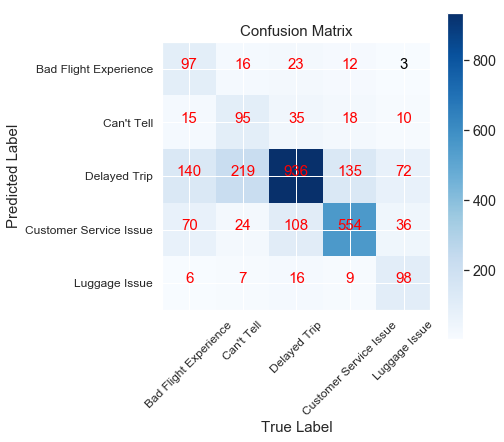

In [27]:
cm = confusion_matrix(predictions,y_neg_test, labels=y_neg.cat.categories)

plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y_neg.unique()))
plt.xticks(tick_marks, y_neg.unique(), rotation=45, fontsize=12)
plt.yticks(tick_marks, y_neg.unique(), fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'red'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)

# 5. Result

## recall some of the results from above

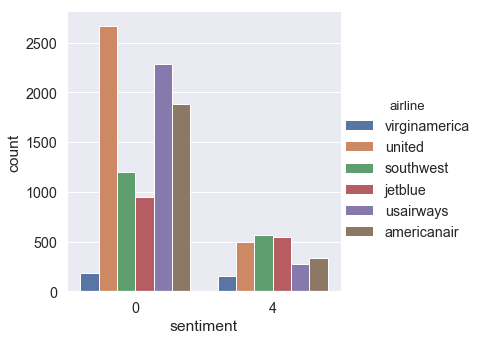

In [29]:
import seaborn as sns
sns.set(font_scale=1.3) #set font scale so it is more readable

#plot sentiment value (0 to be the negative and 4 to be the positive) by couts of observations with airlines as the categories 
sns.catplot(x="sentiment", hue="airline", kind="count", data=us_air)

In [30]:
us_air.describe()

,sentiment
count,11541.000000
mean,0.818993
std,1.614140
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.000000


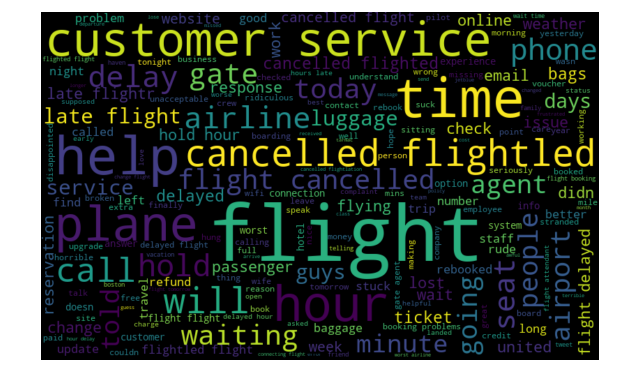

In [31]:
#for negative US air line
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg_air_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

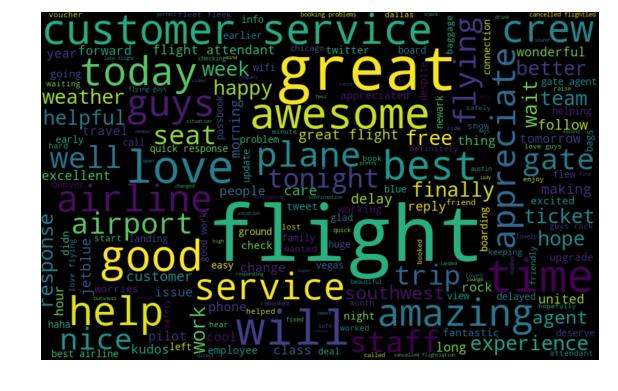

In [32]:
#for positive US air line
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pos_air_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
y_neg_10=negative_us_air['negative_reason'].astype('category')

#spliting
x_neg_train, x_neg_test, y_neg_train_10, y_neg_test_10 = train_test_split(x_neg,y_neg_10,test_size=0.3, random_state=101)

#train model
model_neg_10=LogisticRegression().fit(x_neg_train, y_neg_train_10)

#get the accuracy
accuracy_neg_train = accuracy_score(y_neg_train_10, model_neg.predict(x_neg_train))
accuracy_neg_test = accuracy_score(y_neg_test_10, model_neg.predict(x_neg_test))

print('\nTrain Accuracy of 10 classes:{: .2f}%'.format(accuracy_neg_train*100))
print('\nTest Accuracy of 10 classes:{: .2f}%'.format(accuracy_neg_test*100))


Train Accuracy of 10 classes: 36.01%

Test Accuracy of 10 classes: 30.50%


# What can public opinion on Twitter tell us about the US airlines in 2015?

### According to the distribution, public tends to have negative opinion on Twitter. The mean of the sentiment (0.82) is much lower than neutral (2). As shown in the Word Cloud, a lot of the most frequent words of negative tweets are time related, like delayed, late and cancelled flight, waiting, hour, days and phone. They are most likely related to airlines causing customer to wait and waste time. This might be an area to focus for the airline companies. The positive side are more focused on the service they received, like customer service, great flight, seat, free, appreciate and crew.
### Major airlines like United, US Airways and American Air have significant higher negative tweets both in percentage and counts. While the cheap airlines like Virginia America, South West and JetBlue tend to have much balanced emotion of Twitter public opinion. But Virginia America is a special case that the tweet total count is low comparing to the others and the counts of negative and positive tweets about the company are pretty much equal. 
### The trained model based on generic tweets actually perform relatively well on the US airline data, better than on its own test set with 73.62% against 37.80%. This may because when tweeting about an airline, the sentiment are more polarized that it is easier to be predict while the normal tweets are sometimes with neutral emotion. Hence one way to improve is specify a scenario specified model so that based on the scenario, it can have different features with different weight on the result.


### For the second model, there are several reasons that it failed to predict. One is that the features, generated from words, are still not strong enough to predict the reason. They may be strong enough to predict a tweet’s sentiment which is just a binary value, while the reasons can a lot. Even after combing similar reasons to much broad reasons, there are still 5 different reasons. As shown in the Confusion Matrix, only 2 of them have higher accuracy of prediction from the model. The F1 scores support this claim as well since the score for ‘Customer Service Issue’ and ‘Delayed Trip’ are above 0.7 while the rest are very low. As shown above, without combing classes, the trained model for 10 different reasons performed worse with about 30% accuracy on both train and test set.
### Another reason is that the natural of word. Sometimes words in tweets do not mean what they are supposed to mean. For example, ‘love’ has a high frequency in both negative and positive Word Cloud of generic tweets. In the negative tweets the word ‘love’ could be sarcastic.
### The other reason could be the model used to train is not a good fit. Hence one of the suggestions to improve is to tune the degree of Logistic Regression might produce a better result.  Or using another method, for example Support Vector Machine, to train the model as Logistic Regression perform not so well when the dataset is nonlinear related. 
